In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pyplot 
%matplotlib inline

#import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [10,5]

In [3]:
# Read data

plant_1_wsd = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
plant_2_wsd = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [4]:
# Data shape

print('Plant 1 - Weather_Sensor_Data:',plant_1_wsd.shape)
print('Plant 2 - Weather_Sensor_Data:',plant_2_wsd.shape)

Plant 1 - Weather_Sensor_Data: (3182, 6)
Plant 2 - Weather_Sensor_Data: (3259, 6)


In [5]:
# View first few rows of Plant 1

plant_1_wsd.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


In [6]:
# View first few rows of Plant 2

plant_2_wsd.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0


In [24]:
# View last few rows of Plant 1

plant_1_wsd.tail(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0,2020-06-17,23:15:00
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0,2020-06-17,23:30:00
3181,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00


In [8]:
# View last few rows of Plant 2

plant_2_wsd.tail(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [9]:
# Meaning of the different variables:

#DATE_TIME: Date and time for each observation. Observations recorded at 15 minute intervals.
#PLANT_ID: Plant ID - this will be common for the entire file. 4135001.
#SOURCE_KEY: Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.
#AMBIENT_TEMPERATURE: This is the ambient temperature at the plant.
#MODULE_TEMPERATURE: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
#IRRADIATION: Amount of irradiation for the 15 minute interval.

In [10]:
# Remove Plant_Id & Source_Key for both Plants

plant_1_wsd.drop('PLANT_ID', axis = 1, inplace = True)
plant_2_wsd.drop('PLANT_ID', axis = 1, inplace = True)
plant_1_wsd.drop('SOURCE_KEY', axis = 1, inplace = True)
plant_2_wsd.drop('SOURCE_KEY', axis = 1, inplace = True)

In [12]:
# View first few rows of Plant 1

plant_1_wsd.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0


In [13]:
# View first few rows of Plant 2

plant_2_wsd.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0


In [14]:
# View last few rows of Plant 1

plant_1_wsd.tail(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0
3181,2020-06-17 23:45:00,21.909288,20.427972,0.0


In [15]:
# View last few rows of Plant 2

plant_2_wsd.tail(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,23.202871,22.535908,0.0


In [16]:
# Data Info of Plant 1

plant_1_wsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   AMBIENT_TEMPERATURE  3182 non-null   float64
 2   MODULE_TEMPERATURE   3182 non-null   float64
 3   IRRADIATION          3182 non-null   float64
dtypes: float64(3), object(1)
memory usage: 99.6+ KB


In [17]:
# Data Info of Plant 2

plant_2_wsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   AMBIENT_TEMPERATURE  3259 non-null   float64
 2   MODULE_TEMPERATURE   3259 non-null   float64
 3   IRRADIATION          3259 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.0+ KB


In [18]:
# Any missing in Plant 1?

plant_1_wsd.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [19]:
# Any missing in Plant 2?

plant_2_wsd.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [20]:
# Change type and divide the Date_time in 2 different columns (Date and Time)

# Plant 1

plant_1_wsd['DATE_TIME'] = pd.to_datetime(plant_1_wsd['DATE_TIME'], errors='coerce')
plant_1_wsd['DATE'] = pd.to_datetime(plant_1_wsd['DATE_TIME'].dt.date)
plant_1_wsd['TIME'] = plant_1_wsd['DATE_TIME'].dt.time
plant_1_wsd

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0,2020-06-17,22:45:00
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0,2020-06-17,23:00:00
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0,2020-06-17,23:15:00
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0,2020-06-17,23:30:00


In [21]:
# Data Info of Plant 1

plant_1_wsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
 4   DATE                 3182 non-null   datetime64[ns]
 5   TIME                 3182 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 149.3+ KB


In [19]:
# Change type and divide the Date_time in 2 different columns (Date and Time)

# Plant 2

plant_2_wsd['DATE_TIME'] = pd.to_datetime(plant_2_wsd['DATE_TIME'], errors='coerce')
plant_2_wsd['DATE'] = pd.to_datetime(plant_2_wsd['DATE_TIME'].dt.date)
plant_2_wsd['TIME'] = plant_2_wsd['DATE_TIME'].dt.time
plant_2_wsd

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,2020-06-17,22:45:00
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,2020-06-17,23:00:00
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,2020-06-17,23:15:00
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,2020-06-17,23:30:00


In [20]:
# Correlation btw variables in Plant 1

plant_1_wsd.corr()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
AMBIENT_TEMPERATURE,1.000000,0.853778,0.722999
MODULE_TEMPERATURE,0.853778,1.000000,0.961566
IRRADIATION,0.722999,0.961566,1.000000


In [21]:
# Correlation btw variables in Plant 2

plant_2_wsd.corr()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
AMBIENT_TEMPERATURE,1.000000,0.847273,0.667639
MODULE_TEMPERATURE,0.847273,1.000000,0.946886
IRRADIATION,0.667639,0.946886,1.000000


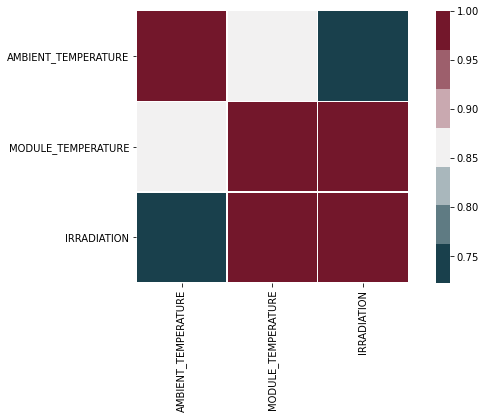

In [22]:
# Heatmap Plant 1

sns.heatmap(plant_1_wsd.corr(),
           cmap=sns.diverging_palette(220, 5, s=80, l=25, n=7),
           linewidths=.5,
           square=True);

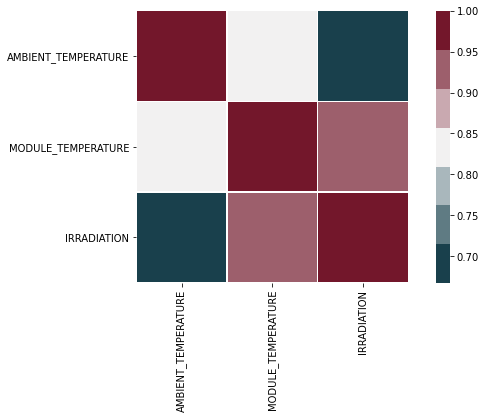

In [23]:
# Heatmap Plant 2

sns.heatmap(plant_2_wsd.corr(),
           cmap=sns.diverging_palette(220, 5, s=80, l=25, n=7),
           linewidths=.5,
           square=True);

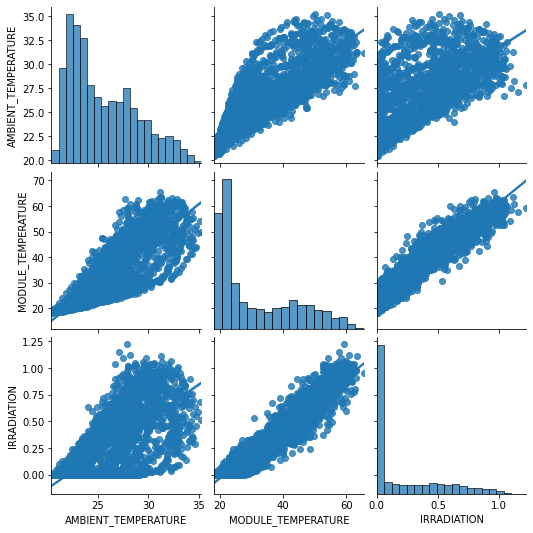

In [24]:
# Pairplot Plant 1

sns.pairplot(plant_1_wsd,kind='reg')

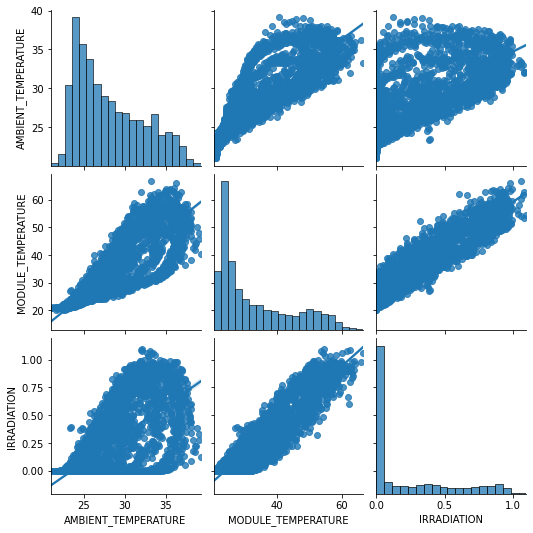

In [25]:
# Pairplot Plant 2

sns.pairplot(plant_2_wsd,kind='reg')

Text(0, 0.5, '(°C)')

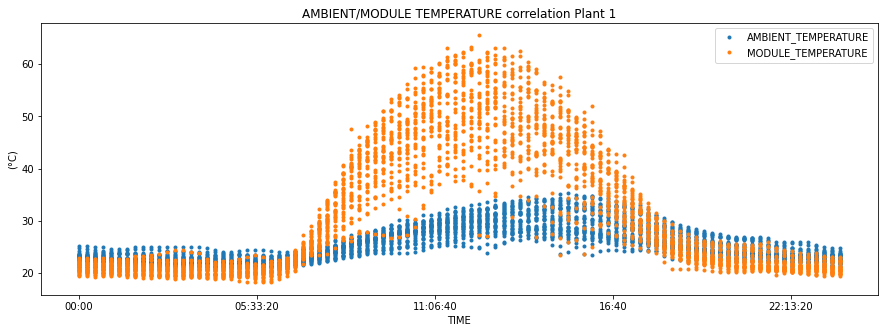

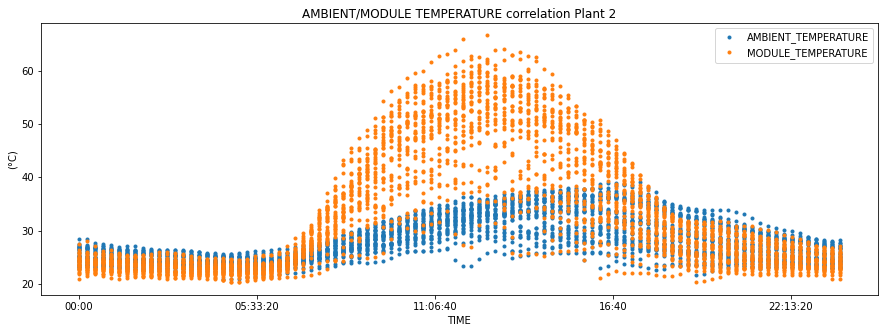

In [27]:
# Ambient T & Module T plot for both Plants 

plant_1_wsd[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','TIME']].plot(x='TIME', label='Plant 1', 
            title='AMBIENT/MODULE TEMPERATURE correlation Plant 1', figsize=(15,5), style='.')
plt.ylabel('(°C)')
plant_2_wsd[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','TIME']].plot(x='TIME', label='Plant 2',
            title='AMBIENT/MODULE TEMPERATURE correlation Plant 2', figsize=(15,5), style='.')
plt.ylabel('(°C)')

Text(0.5, 1.0, 'IRRADIATION correlation between Plant 1 & 2')

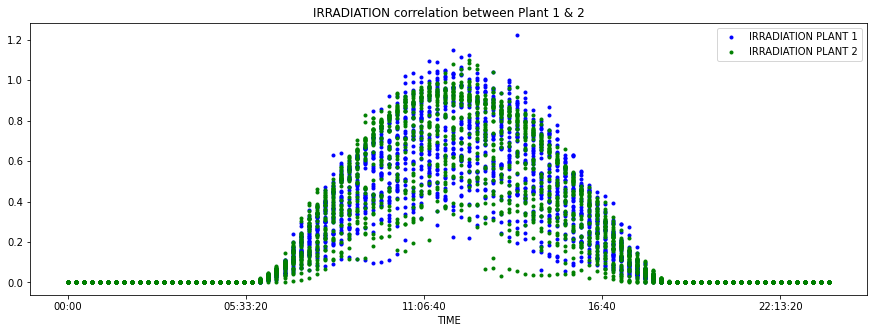

In [28]:
# Irradiation plot for both Plants 

aq = plant_1_wsd.plot(x='TIME', y='IRRADIATION', legend=True, label='IRRADIATION PLANT 1', color='Blue', style='.', figsize=(15,5))
plant_2_wsd.plot(x='TIME', y='IRRADIATION', legend=True, label='IRRADIATION PLANT 2',  color='Green', style='.', ax=aq)
plt.title('IRRADIATION correlation between Plant 1 & 2')

NameError: name 'cols' is not defined

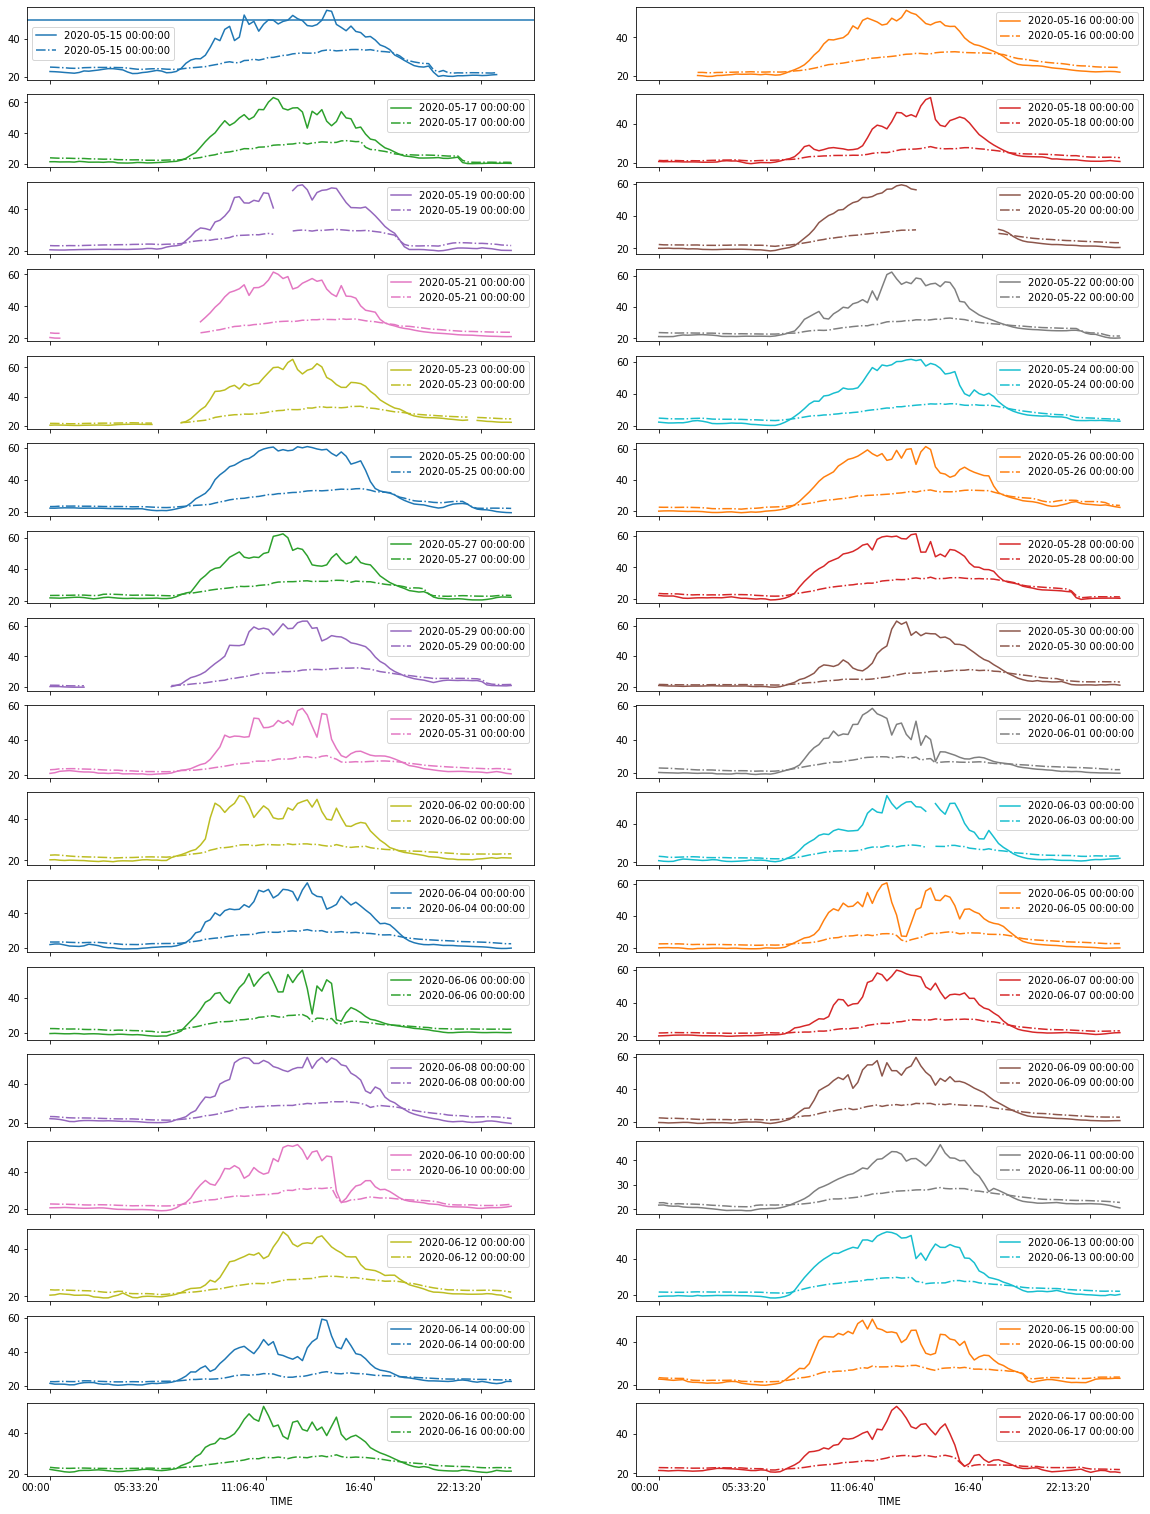

In [23]:
# Relation btw Module temperature and Ambient Temperature each day in Plant 1

ax= plant_1_wsd.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant_1_wsd.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

NameError: name 'cols' is not defined

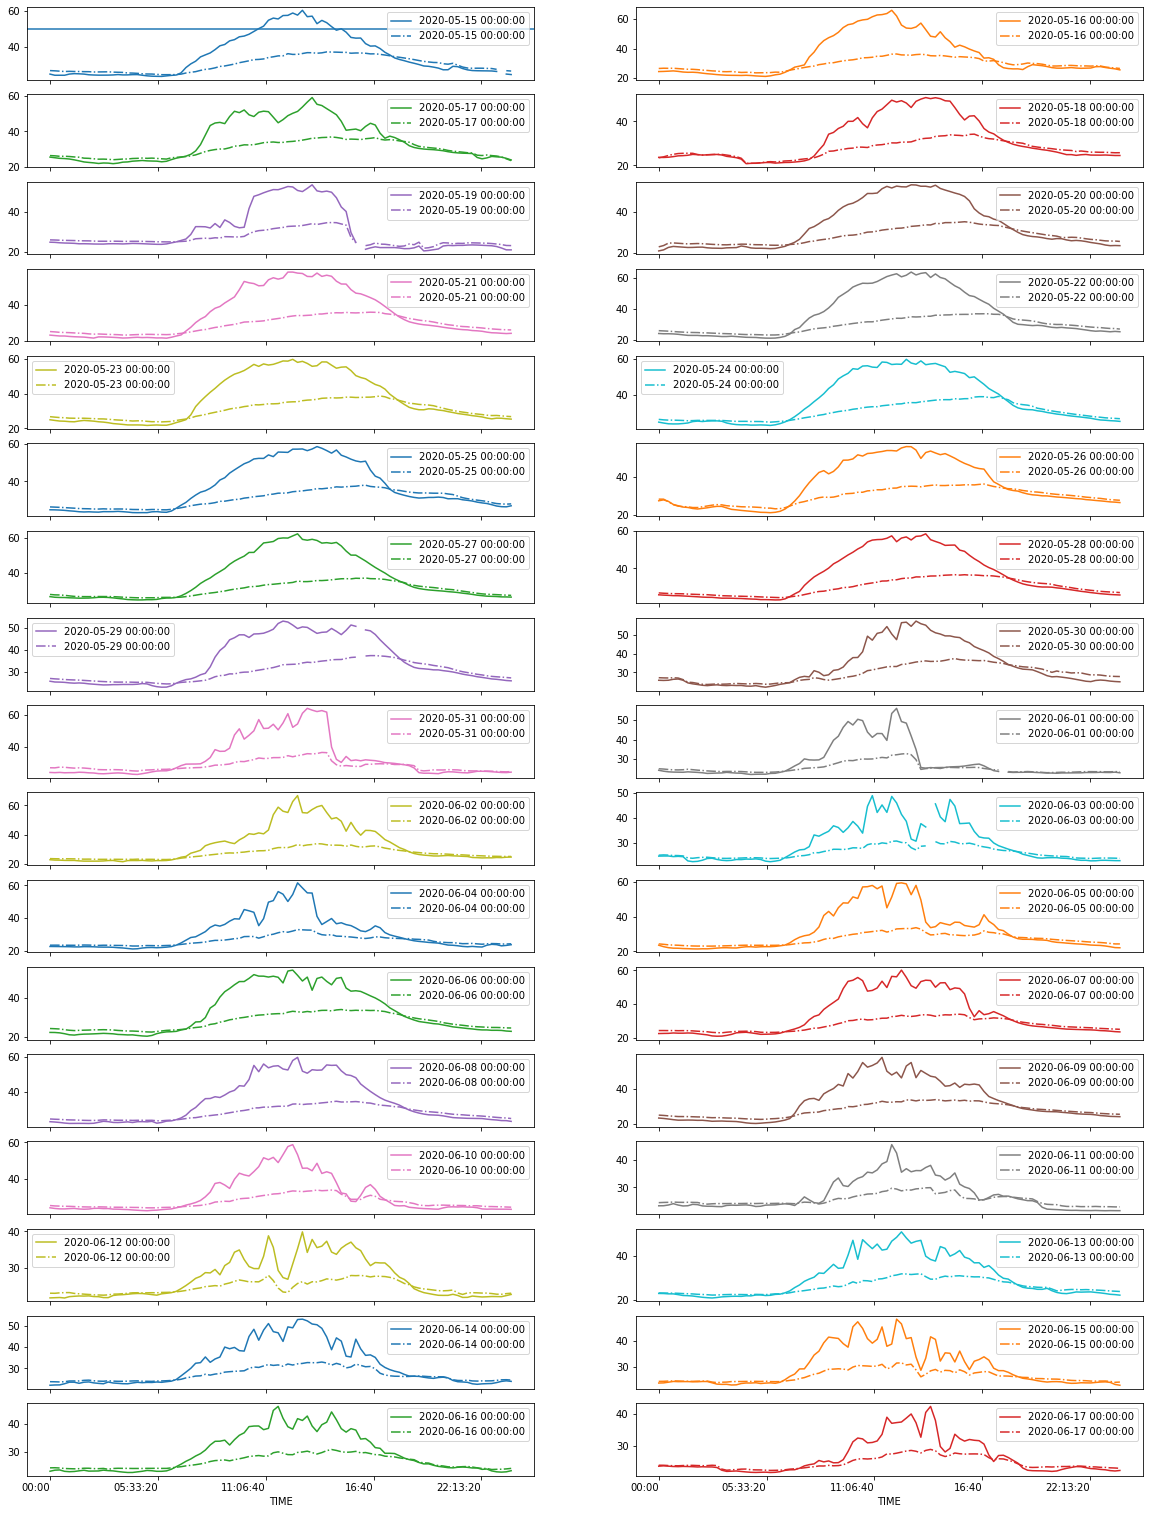

In [102]:
# Relation btw Module temperature and Ambient Temperature each day in Plant 2

ax= plant_2_wsd.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant_2_wsd.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()